In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("uber.csv")

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
#things to do 
# 1. removed unnamed and key
# 2. handle null values
# 3. split pickup date and time


# Preprocess the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.shape

(200000, 9)

In [8]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [10]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
backup = df
backup.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [14]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [15]:
df.fillna(value= df['dropoff_longitude'].mean(),inplace=True)
df.fillna(value= df['dropoff_latitude'].median(),inplace=True)

In [16]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [18]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [19]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [20]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [22]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek
              )

In [23]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [25]:
df = df.drop('pickup_datetime', axis=1)

In [26]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


# Outliers

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

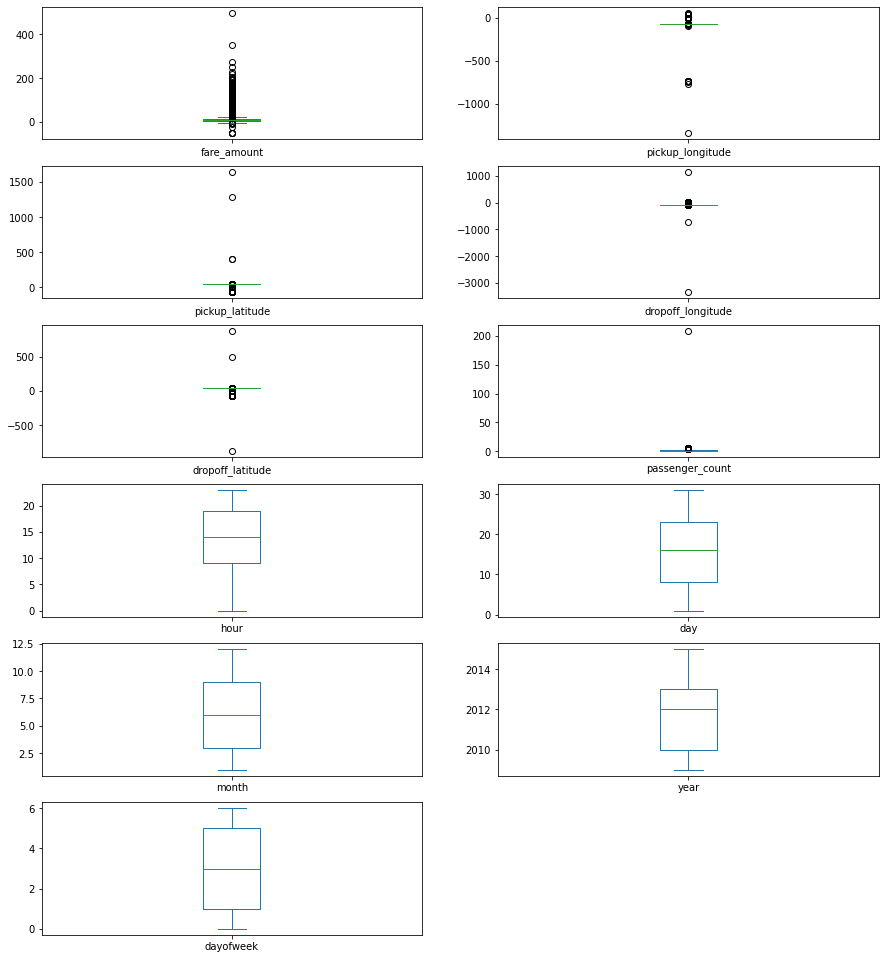

In [27]:
df.plot(kind='box', subplots=True, layout=(7,2), figsize=(15,20)) # check outliers

In [30]:
def remove_ouliers(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3-Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_ouliers(df, c)
    return df1    

In [31]:
df = treat_outliers_all(df, df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

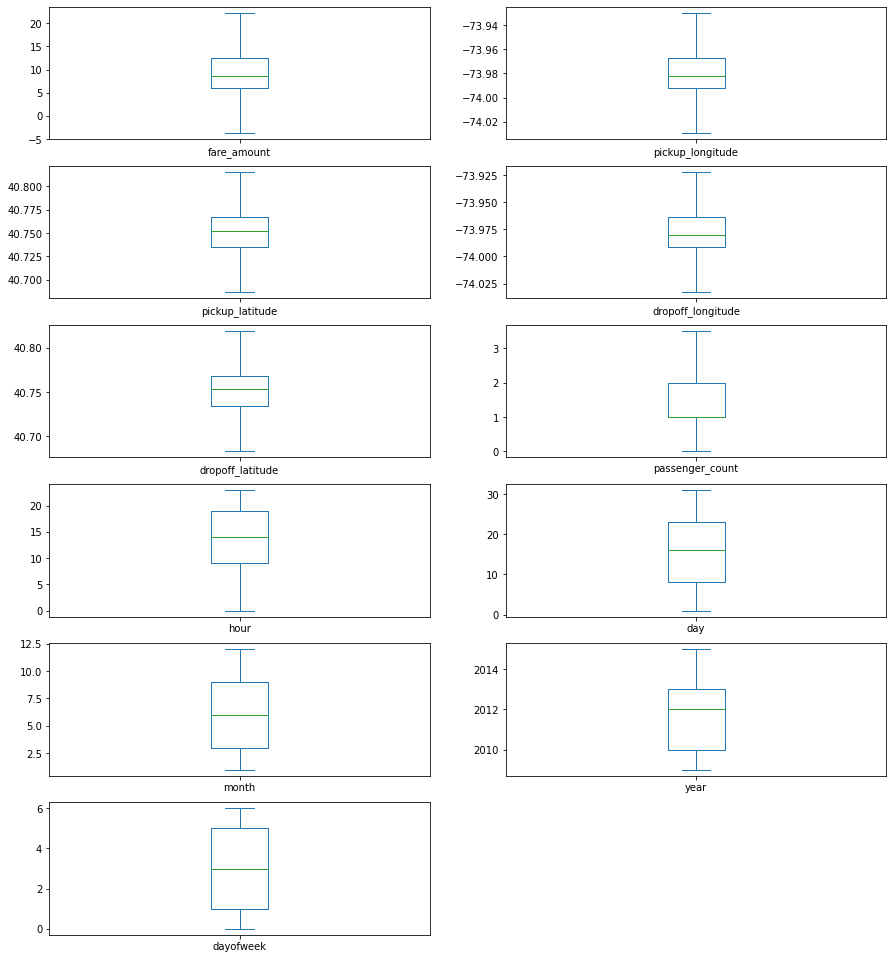

In [32]:
df.plot(kind='box', subplots=True, layout=(7,2), figsize=(15,20)) # check outliers

# Corelation

In [33]:
# Corelation
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325,-0.046578,-0.004027,0.002394,0.011355,-0.003349
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550
hour,-0.023623,0.011579,0.029681,-0.046578,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947
day,0.004534,-0.003204,-0.001553,-0.004027,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617
month,0.030817,0.001169,0.001562,0.002394,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786
year,0.141277,0.010198,-0.014243,0.011355,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113


<AxesSubplot:>

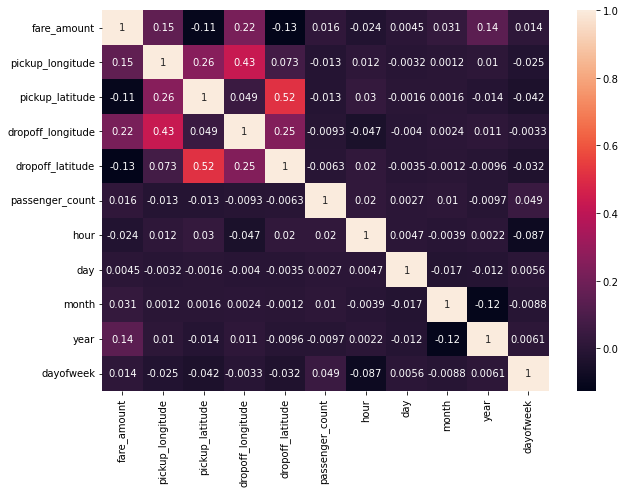

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)

# Models Building

In [42]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')

In [43]:
X = df[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek']]
Y = df['fare_amount']

In [44]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6
199996,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4
199997,-73.986017,40.756487,-73.922034,40.692588,2.0,0,29,6,2009,0
199998,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2


In [45]:
Y

0          7.50
1          7.70
2         12.90
3          5.30
4         16.00
          ...  
199995     3.00
199996     7.50
199997    22.25
199998    14.50
199999    14.10
Name: fare_amount, Length: 200000, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [47]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [51]:
model1.fit(x_train,y_train)
pred1 = model1.predict(x_test)

In [54]:
#metrics evaluation
from sklearn.metrics import r2_score
r2_model1 = r2_score(y_test, pred1)
print("R2 score for 1st model is : ",r2_model1*100)

R2 score for 1st model is :  10.963990801689638


In [55]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, pred1)
print("MSE for 1st model is : ",mse1)

MSE for 1st model is :  26.380257665817993


In [56]:
RMSE1 = np.sqrt(mse1)
RMSE1

5.136171498871313

In [57]:
# Random forest Regression
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100)

In [58]:
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)

In [ ]:
# metrics
r2_model2 = r2_score(y_test, pred2)
mse2 = mean_squared_error(y_test, pred2)
rmse2 = np.
print("R2 score: ",r2_model2)
print("Mse score")